Data Cleaning

In [37]:
# Import Statements

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import string
import regex as re


from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn import set_config

from PIL import Image
from wordcloud import WordCloud
from textwrap import wrap

import joblib

Step 1: Load the Data


In [38]:
df = pd.read_csv(r'..\\data\\best_travel_destinations_for_2025.csv', encoding='latin1')
df.head()

Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description Country Continent  
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa  
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa  
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa  
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa  
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa

Step 2: Handle Missing Data


In [39]:
# Check the first few rows to inspect the data
print(df.head())

# Check data types and for any missing values
print(df.info())

                       Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description Country Continent  
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa  
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa  
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa  
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa  
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attraction   18040 non-null  object
 1   Description  18040 non-null  object
 2   Country      18040 non-null  object
 3   Continent    18040 no

In [4]:
# Previewing the bottom of our dataset
df.tail()

Attraction  \
18035                Byzantine Basilica   
18036  Sharif Al Hussein Bin Ali Mosque   
18037                     North Theatre   
18038                             Shops   
18039                   Rakhabat Canyon   

                                             Description Country    Continent  
18035  Near the Citadel's archaeological museum is th...  Jordan  Middle East  
18036  This grand and beautiful gleaming white mosque...  Jordan  Middle East  
18037  The North Theatre is overgrown and missing muc...  Jordan  Middle East  
18038  The shells of a row of shops remain in the wes...  Jordan  Middle East  
18039  Close to Rum village, the labyrinthine siqs of...  Jordan  Middle East

Step 3: Remove Duplicates


In [40]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify that duplicates are removed
print(df.duplicated().sum())

9
0


In [41]:
df.shape

(18031, 4)

Step 4: Remove Unnecessary White Spaces


In [42]:
# Strip leading/trailing spaces from the text columns
df['Attraction'] = df['Attraction'].str.strip()
df['Description'] = df['Description'].str.strip()

# Verify that the text is cleaned
print(df[['Attraction', 'Description']].head())

                       Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description  
0  Amboseli belongs in the elite of Kenyaâs nat...  
1  This 16th-century fort and Unesco World Herita...  
2  Occupying a plot within Nairobi National Park,...  
3  Welcome to Kenyaâs most accessible yet incon...  
4  Kenyaâs wonderful National Museum, housed in...  


Step 5: Text Normalization


a. Convert Text to Lowercase



In [44]:
# Convert the 'Attraction' and 'Description' columns to lowercase
df['Attraction'] = df['Attraction'].str.lower()
df['Description'] = df['Description'].str.lower()

# Verify the changes
print(df[['Attraction', 'Description']].head())


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs in the elite of kenyas nation...  
1  this thcentury fort and unesco world heritage ...  
2  occupying a plot within nairobi national park ...  
3  welcome to kenyas most accessible yet incongru...  
4  kenyas wonderful national museum housed in an ...  


b. Remove Special Characters


In [45]:


# Function to remove non-alphanumeric characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply this function to the 'Attraction' and 'Description' columns
df['Attraction'] = df['Attraction'].apply(remove_special_characters)
df['Description'] = df['Description'].apply(remove_special_characters)

# Verify the changes
print(df[['Attraction', 'Description']].head())


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs in the elite of kenyas nation...  
1  this thcentury fort and unesco world heritage ...  
2  occupying a plot within nairobi national park ...  
3  welcome to kenyas most accessible yet incongru...  
4  kenyas wonderful national museum housed in an ...  


c. Remove Stopwords


In [46]:
import nltk
from nltk.corpus import stopwords

# List of stopwords in English
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the function to both columns
df['Attraction'] = df['Attraction'].apply(remove_stopwords)
df['Description'] = df['Description'].apply(remove_stopwords)

# Verify the changes
print(df[['Attraction', 'Description']].head())


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description  
0  amboseli belongs elite kenyas national parks e...  
1  thcentury fort unesco world heritage treasure ...  
2  occupying plot within nairobi national park no...  
3  welcome kenyas accessible yet incongruous safa...  
4  kenyas wonderful national museum housed imposi...  


Step 6: Handle Outliers or Strange Entries


In [47]:
# Remove rows with very short descriptions (less than 5 words)
df = df[df['Description'].apply(lambda x: len(x.split()) > 5)]

# Check the first few rows again
print(df.head())


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas wonderful national museum housed imposi...   Kenya    Africa  


Step 7: Final Review and Save Cleaned Data


In [48]:
# Final review of the cleaned data
print(df.info())
print(df.head())

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_attractions_data.csv', index=False)
print("Cleaned data saved to 'cleaned_attractions_data.csv'")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17959 entries, 0 to 18039
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attraction   17959 non-null  object
 1   Description  17959 non-null  object
 2   Country      17959 non-null  object
 3   Continent    17959 non-null  object
dtypes: object(4)
memory usage: 701.5+ KB
None
                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas w

### Class Imbalance


First, we should check if there is any class imbalance in the target column (Continent).
This will show you the distribution of each continent in your dataset. If there is a significant imbalance (e.g., some continents having many more attractions than others), we'll need to take steps to address it.

Asia             4447
Europe           3598
North America    3463
Africa           1673
Oceania          1672
South America    1635
Middle East      1471
Name: Continent, dtype: int64


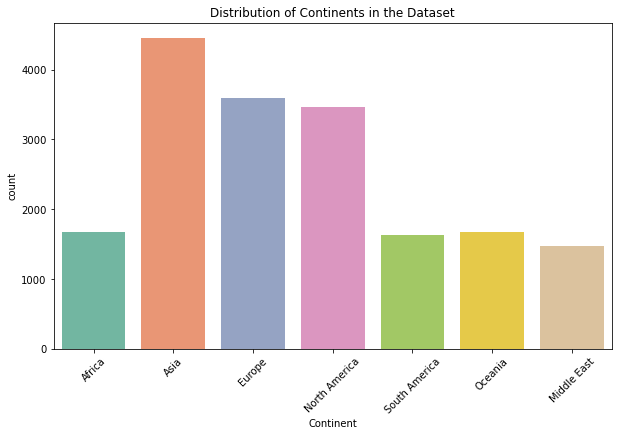

In [49]:
# Check the distribution of the 'Continent' column
continent_counts = df['Continent'].value_counts()
print(continent_counts)

# Plot the distribution of the 'Continent' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df, palette='Set2')
plt.title('Distribution of Continents in the Dataset')
plt.xticks(rotation=45)
plt.show()

Yes, there is class imbalance, particularly between the Asia/Europe/North America group (which has much more data) and the Africa/Oceania/South America/Middle East group (which has fewer data points). we need to adress the imbalance


In [53]:
# Check the first few rows of the original DataFrame to verify column names
print(df.head())

# Check column names
print(df.columns)


                       Attraction  \
0          amboseli national park   
1                      fort jesus   
2  david sheldrick wildlife trust   
3           nairobi national park   
4                 national museum   

                                         Description Country Continent  
0  amboseli belongs elite kenyas national parks e...   Kenya    Africa  
1  thcentury fort unesco world heritage treasure ...   Kenya    Africa  
2  occupying plot within nairobi national park no...   Kenya    Africa  
3  welcome kenyas accessible yet incongruous safa...   Kenya    Africa  
4  kenyas wonderful national museum housed imposi...   Kenya    Africa  
Index(['Attraction', 'Description', 'Country', 'Continent'], dtype='object')


In [54]:
import nltk
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function for basic text preprocessing
def preprocess_text(text):
    # Check if the text is a string, in case there are NaN values
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove punctuation and numbers
        text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
        
        # Tokenize and remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        return ' '.join(filtered_tokens)
    else:
        return ''

# Apply preprocessing to 'Description' column
df['Description_clean'] = df['Description'].apply(preprocess_text)

# Check if the 'Description_clean' column has been added correctly
print(df[['Description', 'Description_clean']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Annolyne.Chemutai\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


                                         Description  \
0  amboseli belongs elite kenyas national parks e...   
1  thcentury fort unesco world heritage treasure ...   
2  occupying plot within nairobi national park no...   
3  welcome kenyas accessible yet incongruous safa...   
4  kenyas wonderful national museum housed imposi...   

                                   Description_clean  
0  amboseli belongs elite kenyas national parks e...  
1  thcentury fort unesco world heritage treasure ...  
2  occupying plot within nairobi national park no...  
3  welcome kenyas accessible yet incongruous safa...  
4  kenyas wonderful national museum housed imposi...  


#### Create the Document-Term Matrix (DTM)

Now, we can proceed with Count Vectorization and TF-IDF Vectorization.

a. Count Vectorization

In [55]:
# CountVectorizer - Converts text data into a matrix of token counts
count_vectorizer = CountVectorizer(max_features=1000)  # Limiting to top 1000 words
X_count = count_vectorizer.fit_transform(df['Description_clean'])

# Get the feature names (words)
count_features = count_vectorizer.get_feature_names_out()

# Convert the DTM to a DataFrame
dtm_count = pd.DataFrame(X_count.toarray(), columns=count_features)

# Check the document-term matrix
print(dtm_count.head())


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [18]:
sorted_Country = Country.sort_values(by='Attraction', ascending=False)
sorted_Country

Country  Attraction  Description  Continent
12                 Italy        1200         1200       1200
8                 France        1200         1200       1200
13                 Japan        1200         1200       1200
1              Australia        1200         1200       1200
9                Germany        1200         1200       1200
24         United States        1200         1200       1200
10                 India        1198         1198       1198
3                 Canada        1198         1198       1198
5                  China        1196         1196       1196
16                Mexico        1080         1080       1080
22                Turkey        1040         1040       1040
21              Thailand         880          880        880
20          South Africa         640          640        640
2                 Brazil         600          600        600
6                  Egypt         520          520        520
18           New Zealand         400          400        400
19                  Peru         360          360        360
0              Argentina         360          360        360
17               Morocco         360          360        360
4                  Chile         319          319        319
14                Jordan         160          160        160
11                Israel         160          160        160
15                 Kenya         160          160        160
23  United Arab Emirates         120          120        120
7                   Fiji          80           80         80

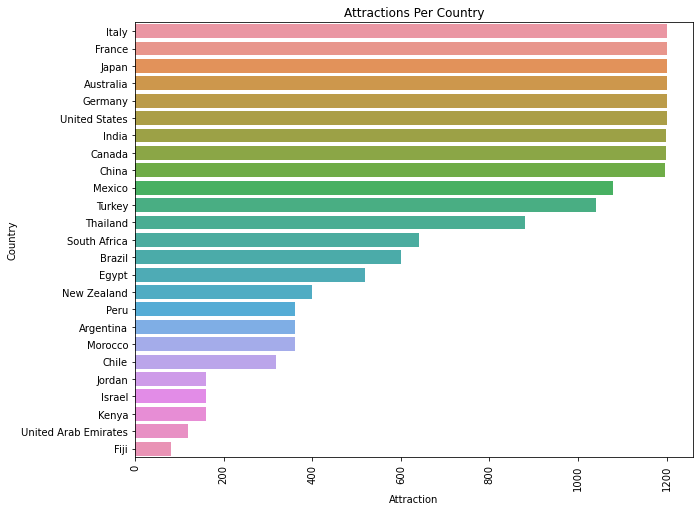

In [19]:
# Plot the class imbalance
plt.figure(figsize=(10,8))
sns.barplot(x='Attraction', y='Country', data=sorted_Country)
plt.title('Attractions Per Country')
plt.xticks(rotation=90)
plt.show()

## Text Cleaning & Preprocessing & More Exploration
- Remove punctuation and numbers
- Lowercase everything
- Remove stopwords
- Create a document term matrix grouped by city 
    - count vectorization
    - tf-idf vectorization
    - bi-grams
- Visualize most frequent words
    - word clouds
    - bar plot/histogram

In [20]:
# Create a list of stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [21]:
stopwords_list[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
# Save stopwords list for app
#joblib.dump(stopwords_list, '/Users/tiaplagata/Documents/Flatiron/capstone-project/Data/stopwords_list')

In [23]:
# Lowercase all words in each corpus
df['cleaned'] = df['Attraction'].apply(lambda x: x.lower())
df.head()

Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description Country Continent  \
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa   
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa   
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa   
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa   
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa   

                          cleaned  
0          amboseli national park  
1                      fort jesus  
2  david sheldrick wildlife trust  
3           nairobi national park  
4                 national museum

In [24]:
# Remove commas, hyphens, colons, and other punctuation
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df.head()

Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   

                                         Description Country Continent  \
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa   
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa   
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa   
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa   
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa   

                          cleaned  
0          amboseli national park  
1                      fort jesus  
2  david sheldrick wildlife trust  
3           nairobi national park  
4                 national museum

In [25]:
# Use regex to get rid of numbers 
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df.head(10)

Attraction  \
0          Amboseli National Park   
1                      Fort Jesus   
2  David Sheldrick Wildlife Trust   
3           Nairobi National Park   
4                 National Museum   
5                  Giraffe Centre   
6                     Lamu Museum   
7                    Galana River   
8                   Mzima Springs   
9          Ngulia Rhino Sanctuary   

                                         Description Country Continent  \
0  Amboseli belongs in the elite of Kenyaâs nat...   Kenya    Africa   
1  This 16th-century fort and Unesco World Herita...   Kenya    Africa   
2  Occupying a plot within Nairobi National Park,...   Kenya    Africa   
3  Welcome to Kenyaâs most accessible yet incon...   Kenya    Africa   
4  Kenyaâs wonderful National Museum, housed in...   Kenya    Africa   
5  This centre, which protects the highly endange...   Kenya    Africa   
6  The best museum in town (and the second best i...   Kenya    Africa   
7  Running through the heart of the park and mark...   Kenya    Africa   
8  Mzima Springs is an oasis of green in the west...   Kenya    Africa   
9  At the base of Ngulia Hills, this 90-sq-km are...   Kenya    Africa   

                          cleaned  
0          amboseli national park  
1                      fort jesus  
2  david sheldrick wildlife trust  
3           nairobi national park  
4                 national museum  
5                  giraffe centre  
6                     lamu museum  
7                    galana river  
8                   mzima springs  
9          ngulia rhino sanctuary

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize and lemmatize the 'cleaned' column
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize the tokens
    return " ".join(lemmatized_tokens)  # Rejoin the tokens into a string

# Apply the lemmatization function to the 'cleaned' column
df['lemmatized'] = df['cleaned'].apply(lemmatize_text)

# Display the resulting DataFrame
print(df[['cleaned', 'lemmatized']])

                                cleaned                        lemmatized
0                amboseli national park            amboseli national park
1                            fort jesus                        fort jesus
2        david sheldrick wildlife trust    david sheldrick wildlife trust
3                 nairobi national park             nairobi national park
4                       national museum                   national museum
...                                 ...                               ...
18035                byzantine basilica                byzantine basilica
18036  sharif al hussein bin ali mosque  sharif al hussein bin ali mosque
18037                     north theatre                     north theatre
18038                             shops                              shop
18039                   rakhabat canyon                   rakhabat canyon

[18031 rows x 2 columns]


In [27]:
# Group the corpora by city and join them
df_to_group = df[['Country', 'lemmatized']]
df_grouped = df_to_group.groupby(by='Country').agg(lambda x:' '.join(x))
df_grouped

lemmatized
Country                                                                
Argentina             glaciar perito moreno los seismiles palacio ba...
Australia             bondi beach royal botanic garden twelve apostl...
Brazil                parque nacional da tijuca pã£o de aã§ãºcar cop...
Canada                banff national park stanley park lake louise m...
Chile                 parque nacional patagonia orongo ceremonial vi...
China                 peak tram mogao grotto temple of heaven park a...
Egypt                 amun temple enclosure st catherine monastery t...
Fiji                  coloisuva forest park fiji museum suva municip...
France                citã© de lâespace eiffel tower centre pompid...
Germany               east side gallery kã¶lner dom aachener dom sch...
India                 mehrangarh taj mahal city palace amber fort su...
Israel                bahaâi garden masada national park basilica ...
Italy                 vatican museum st peter basilica roman forum p...
Japan                 mt fuji tokyo national museum peace park nishi...
Jordan                petra citadel shaumari wildlife reserve darat ...
Kenya                 amboseli national park fort jesus david sheldr...
Mexico                tulum ruin parque nacional isla contoy sfer ik...
Morocco               jardin majorelle djemaa el fna musã©e yves sai...
New Zealand           one tree hill huka fall slope point te matua n...
Peru                  laguna parã³n chavã­n de huã¡ntar caral isla a...
South Africa          kirstenbosch national botanical garden constit...
Thailand              wat pho grand palace wat arun wat phra kaew lu...
Turkey                hagia sophia grand mosque topkapä± palace kari...
United Arab Emirates  burj al arab burj khalifa madinat jumeirah kit...
United States         great smoky mountain national park glacier nat...

In [28]:
# Save grouped df
df_grouped.to_csv('../Data/df_grouped')

### Look at different vectorization strategies
- Try different vectorization strategies and visualize them with word clouds
    - count vectorization
    - tf-idf vectorization
    - bi-grams

In [29]:
# Create a document term matrix using count vectorization
# Using count vectorization (most simple way to vectorize)
cv = CountVectorizer(analyzer='word', stop_words=stopwords_list)
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm

aachen  aachener  aath  ab  aba  abaca  abad  abakh  \
Country                                                                     
Argentina                  0         0     0   0    0      0     0      0   
Australia                  0         0     0   0    0      0     0      0   
Brazil                     0         0     0   0    0      0     0      0   
Canada                     0         0     0   0    0      0     0      0   
Chile                      0         0     0   0    1      0     0      0   
China                      0         0     0   0    0      0     0      1   
Egypt                      0         0     0   3    0      0     0      0   
Fiji                       0         0     0   0    0      1     0      0   
France                     0         0     0   0    0      0     0      0   
Germany                    1         1     0   0    0      0     0      0   
India                      0         0     1   0    0      0     0      0   
Israel                     0         0     0   0    0      0     0      0   
Italy                      0         0     0   0    0      0     0      0   
Japan                      0         0     0   0    0      0     0      0   
Jordan                     0         0     0   0    0      0     1      0   
Kenya                      0         0     0   0    0      0     0      0   
Mexico                     0         0     0   0    0      0     0      0   
Morocco                    0         0     0   0    0      0     0      0   
New Zealand                0         0     0   0    0      0     0      0   
Peru                       0         0     0   0    0      0     0      0   
South Africa               0         0     0   0    0      0     0      0   
Thailand                   0         0     0   0    0      0     0      0   
Turkey                     0         0     0   0    0      0     0      0   
United Arab Emirates       0         0     0   0    0      0     0      0   
United States              0         0     0   0    0      0     0      0   

                      aban  abandoned  ...  zã³calo  zã¼ber  zã¼beyde  zä  zå  \
Country                                ...                                      
Argentina                0          0  ...        0       0         0   0   0   
Australia                0          0  ...        0       0         0   0   0   
Brazil                   0          0  ...        0       0         0   0   0   
Canada                   0          0  ...        0       0         0   0   0   
Chile                    0          0  ...        0       0         0   0   0   
China                    0          0  ...        0       0         0   0   0   
Egypt                    1          0  ...        0       0         0   0   0   
Fiji                     0          0  ...        0       0         0   0   0   
France                   0          0  ...        0       0         0   0   0   
Germany                  0          0  ...        0       0         0   0   0   
India                    0          0  ...        0       0         0   0   0   
Israel                   0          0  ...        0       0         0   0   0   
Italy                    0          0  ...        0       0         0   0   0   
Japan                    0          0  ...        0       0         0   0   4   
Jordan                   0          0  ...        0       0         0   0   0   
Kenya                    0          0  ...        0       0         0   0   0   
Mexico                   0          0  ...        7       0         0   0   0   
Morocco                  0          0  ...        0       0         0   0   0   
New Zealand              0          0  ...        0       0         0   0   0   
Peru                     0          0  ...        0       0         0   0   0   
South Africa             0          0  ...        0       0         0   0   0   
Thailand                 0          0  ...        0       0         0   0   0  

In [30]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities
tfidf = TfidfVectorizer(analyzer='word', stop_words=stopwords_list)
data2 = tfidf.fit_transform(df_grouped['lemmatized'])
df_dtm2 = pd.DataFrame(data2.toarray(), columns=tfidf.get_feature_names())
df_dtm2.index = df_grouped.index
df_dtm2

aachen  aachener      aath        ab       aba  \
Country                                                                  
Argentina             0.000000  0.000000  0.000000  0.000000  0.000000   
Australia             0.000000  0.000000  0.000000  0.000000  0.000000   
Brazil                0.000000  0.000000  0.000000  0.000000  0.000000   
Canada                0.000000  0.000000  0.000000  0.000000  0.000000   
Chile                 0.000000  0.000000  0.000000  0.000000  0.013977   
China                 0.000000  0.000000  0.000000  0.000000  0.000000   
Egypt                 0.000000  0.000000  0.000000  0.040607  0.000000   
Fiji                  0.000000  0.000000  0.000000  0.000000  0.000000   
France                0.000000  0.000000  0.000000  0.000000  0.000000   
Germany               0.008084  0.008084  0.000000  0.000000  0.000000   
India                 0.000000  0.000000  0.008666  0.000000  0.000000   
Israel                0.000000  0.000000  0.000000  0.000000  0.000000   
Italy                 0.000000  0.000000  0.000000  0.000000  0.000000   
Japan                 0.000000  0.000000  0.000000  0.000000  0.000000   
Jordan                0.000000  0.000000  0.000000  0.000000  0.000000   
Kenya                 0.000000  0.000000  0.000000  0.000000  0.000000   
Mexico                0.000000  0.000000  0.000000  0.000000  0.000000   
Morocco               0.000000  0.000000  0.000000  0.000000  0.000000   
New Zealand           0.000000  0.000000  0.000000  0.000000  0.000000   
Peru                  0.000000  0.000000  0.000000  0.000000  0.000000   
South Africa          0.000000  0.000000  0.000000  0.000000  0.000000   
Thailand              0.000000  0.000000  0.000000  0.000000  0.000000   
Turkey                0.000000  0.000000  0.000000  0.000000  0.000000   
United Arab Emirates  0.000000  0.000000  0.000000  0.000000  0.000000   
United States         0.000000  0.000000  0.000000  0.000000  0.000000   

                         abaca      abad     abakh      aban  abandoned  ...  \
Country                                                                  ...   
Argentina             0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Australia             0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Brazil                0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Canada                0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Chile                 0.000000  0.000000  0.000000  0.000000   0.000000  ...   
China                 0.000000  0.000000  0.008662  0.000000   0.000000  ...   
Egypt                 0.000000  0.000000  0.000000  0.013536   0.000000  ...   
Fiji                  0.080171  0.000000  0.000000  0.000000   0.000000  ...   
France                0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Germany               0.000000  0.000000  0.000000  0.000000   0.000000  ...   
India                 0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Israel                0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Italy                 0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Japan                 0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Jordan                0.000000  0.045041  0.000000  0.000000   0.000000  ...   
Kenya                 0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Mexico                0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Morocco               0.000000  0.000000  0.000000  0.000000   0.000000  ...   
New Zealand           0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Peru                  0.000000  0.000000  0.000000  0.000000   0.000000  ...   
South Africa          0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Thailand              0.000000  0.000000  0.000000  0.000000   0.000000  ...   
Turkey                0.000000  0.000000  0.000000  0.000000   0.008059  ...   
United Arab Emirates  0.0

#### Word Clouds with Count Vectorization

In [31]:
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400, height=330, max_words=150, colormap='tab20c').generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)), fontsize=13)
    plt.show()

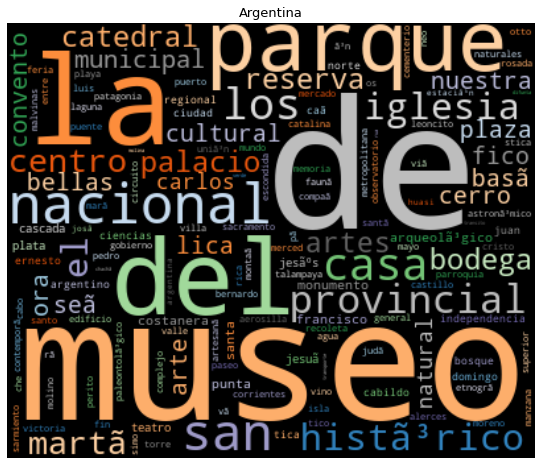

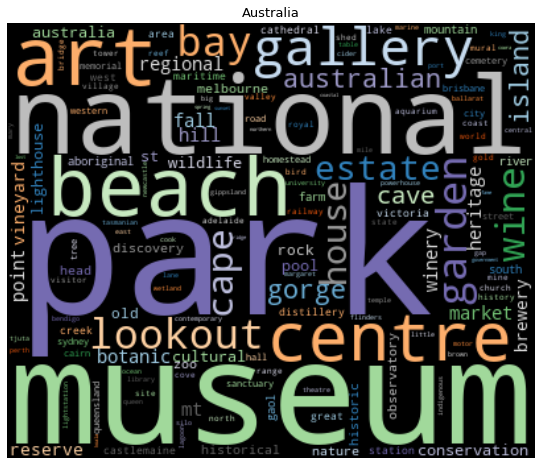

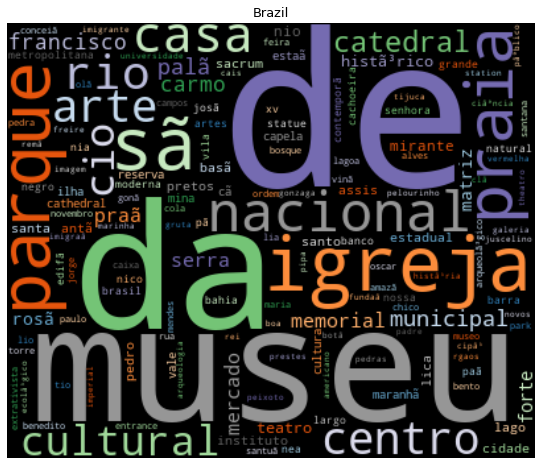

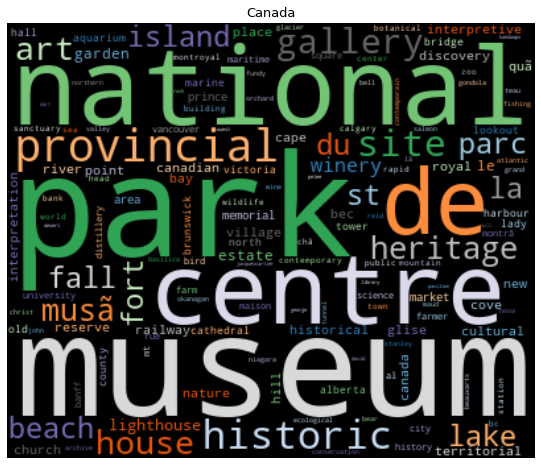

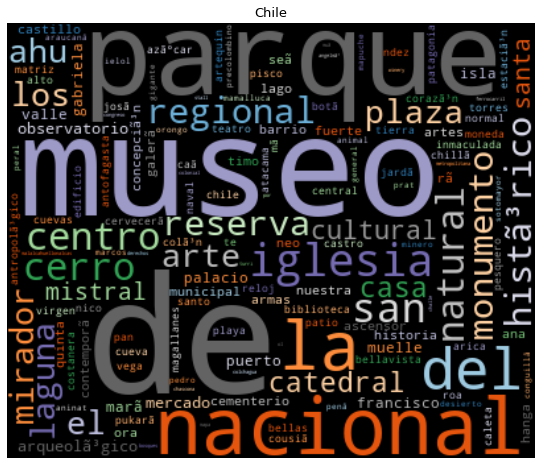

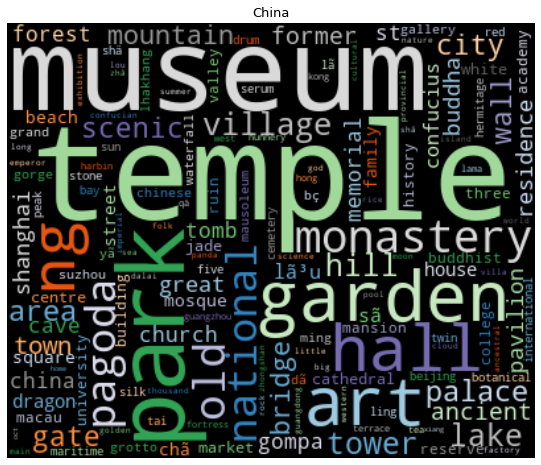

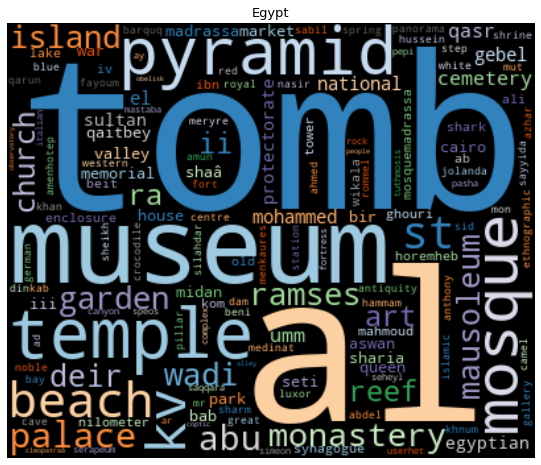

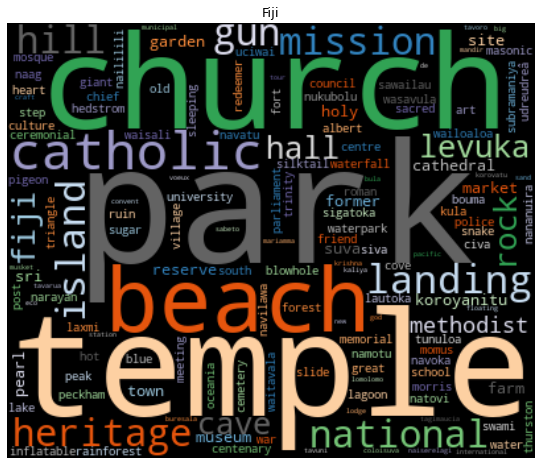

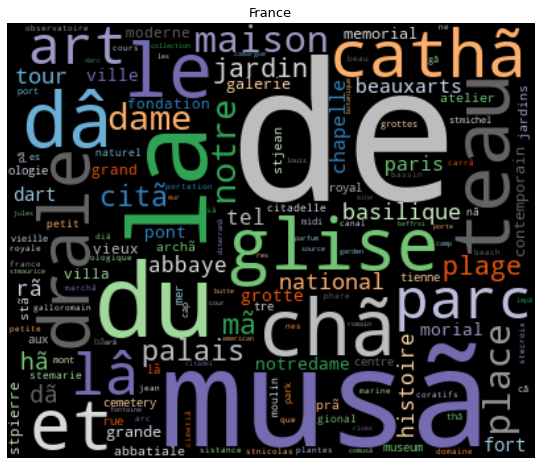

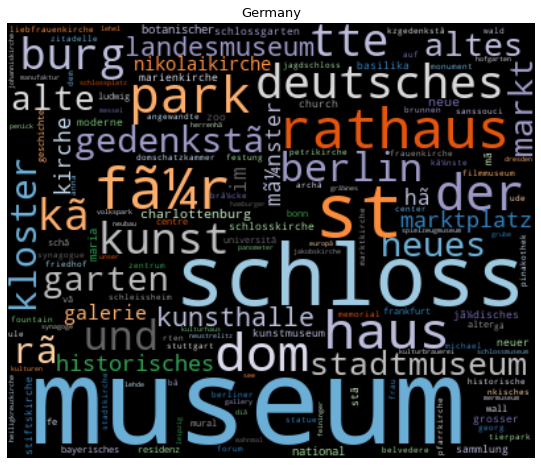

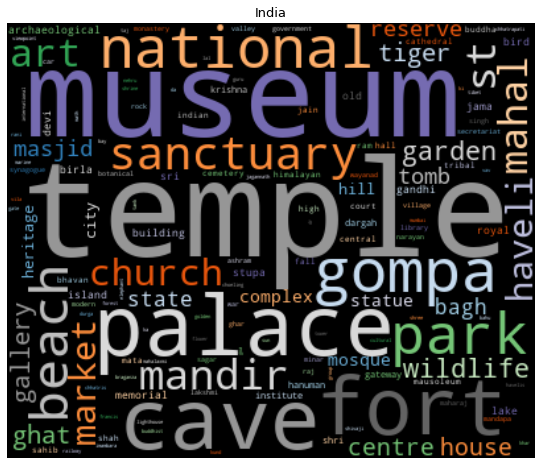

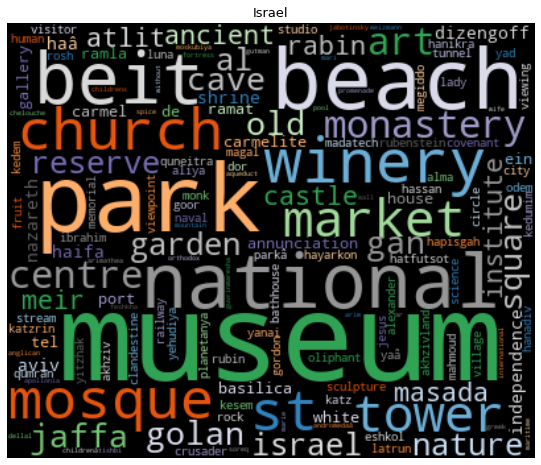

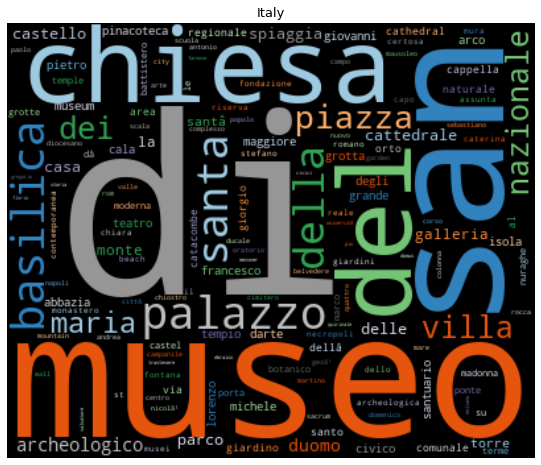

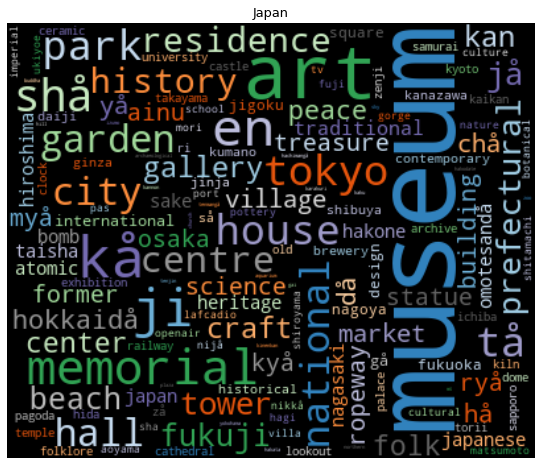

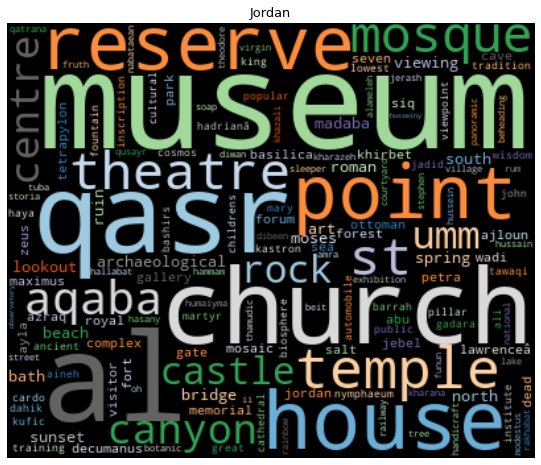

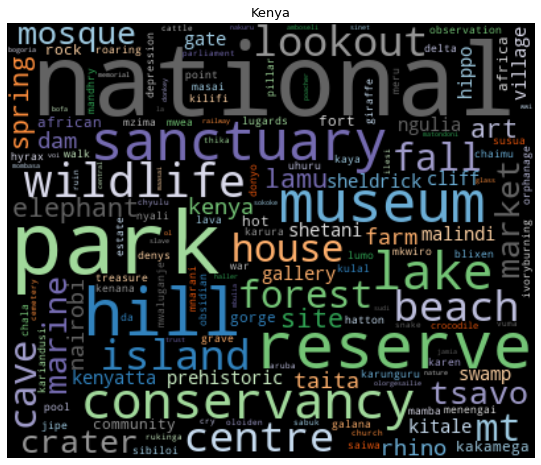

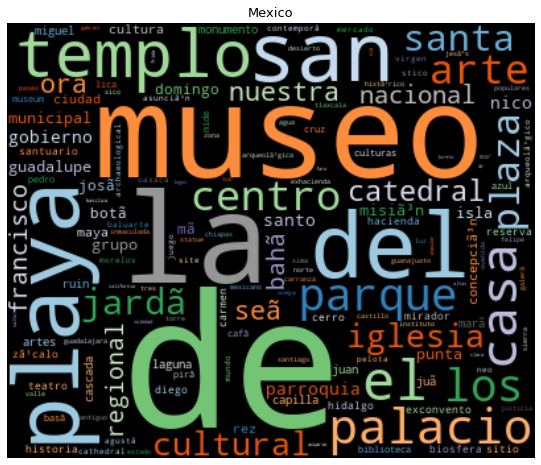

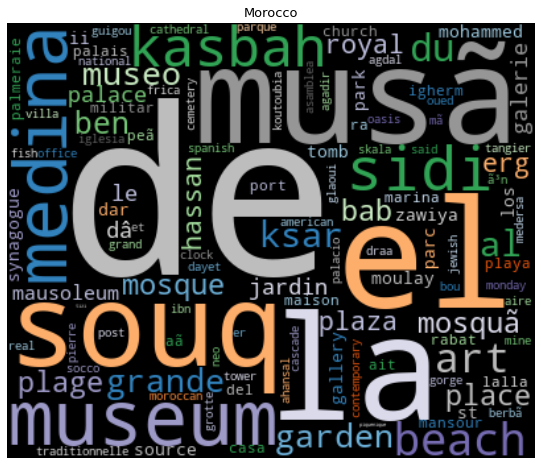

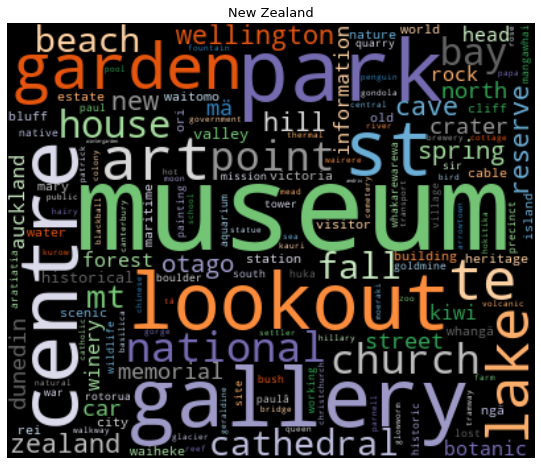

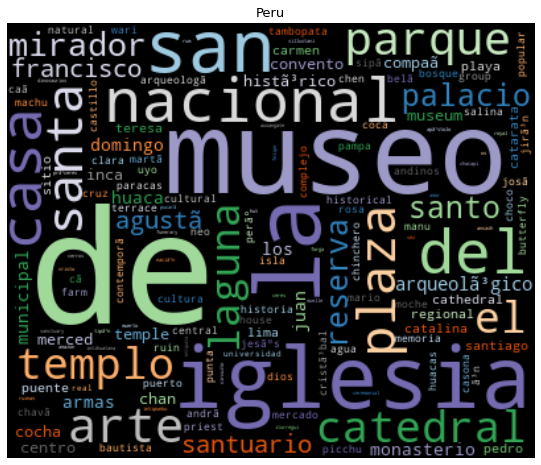

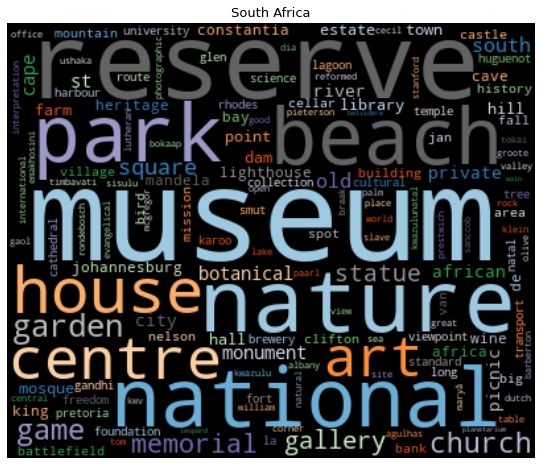

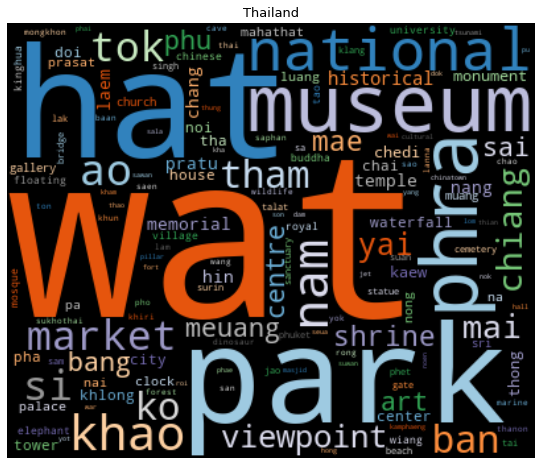

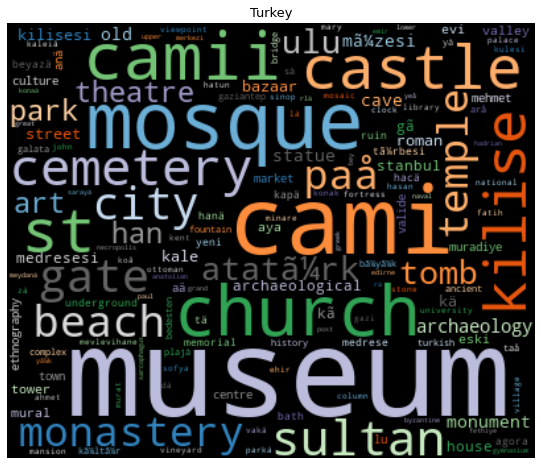

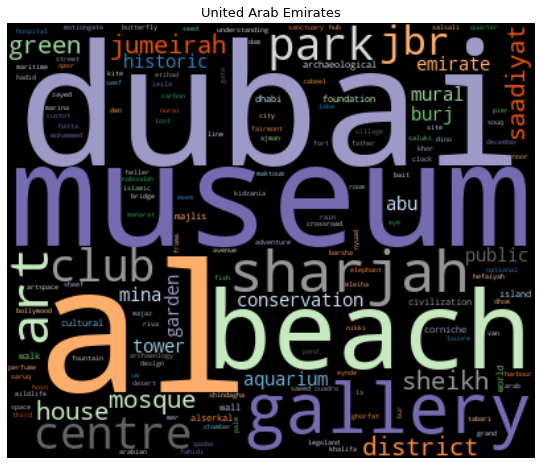

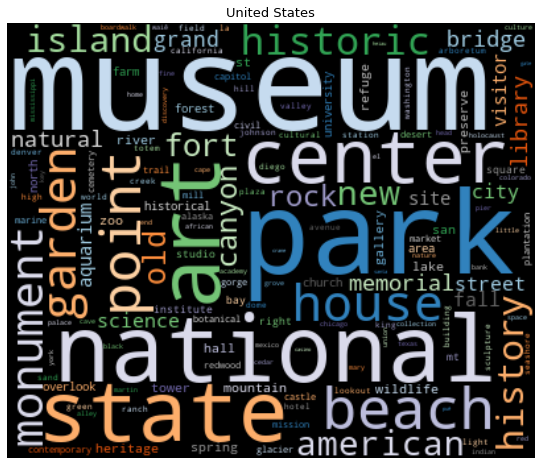

In [32]:
# Transposing document term matrix
df_dtm = df_dtm.transpose()

# Plotting word cloud for each city
for index, Country in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[Country].sort_values(ascending=False), Country)

In [33]:
# Look at top words with count vectorizer (in total, not per city)
sum_words = data.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('de', 1760),
 ('museum', 1645),
 ('park', 807),
 ('museo', 620),
 ('national', 544),
 ('la', 535),
 ('art', 441),
 ('temple', 404),
 ('di', 383),
 ('beach', 300),
 ('musã', 289),
 ('centre', 277),
 ('san', 275),
 ('del', 249),
 ('wat', 225),
 ('garden', 224),
 ('st', 219),
 ('house', 214),
 ('gallery', 209),
 ('church', 165),
 ('parque', 164),
 ('du', 155),
 ('memorial', 149),
 ('reserve', 143),
 ('casa', 137),
 ('nacional', 131),
 ('cave', 131),
 ('santa', 126),
 ('al', 126),
 ('mosque', 125),
 ('fort', 120),
 ('tomb', 119),
 ('city', 117),
 ('market', 116),
 ('da', 110),
 ('island', 108),
 ('palace', 107),
 ('el', 106),
 ('center', 106),
 ('state', 105),
 ('lake', 103),
 ('old', 102),
 ('cultural', 101),
 ('point', 99),
 ('tower', 97),
 ('playa', 95),
 ('le', 95),
 ('basilica', 94),
 ('hill', 94),
 ('heritage', 93),
 ('historic', 92),
 ('museu', 92),
 ('hall', 91),
 ('provincial', 90),
 ('site', 90),
 ('chiesa', 88),
 ('village', 83),
 ('iglesia', 82),
 ('bay', 82),
 ('nature', 82)

**There seems to be a lot of repetition with words like 'tour', 'private', 'transfer' between cities because all of these cities will have airport transfers, and different tours. However, these words will not help in modeling since they are not unique to the cities.**

#### Word Clouds with TF-IDF Vectorization


In [34]:
# Look at top words with tf-idf vectorization (for total words, not per city)
sum_words = data2.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('museum', 5.45417461492245),
 ('de', 4.155517121713543),
 ('park', 2.7403631248560245),
 ('museo', 2.2199536183642947),
 ('national', 2.1093724918831662),
 ('temple', 1.7066749950979285),
 ('art', 1.4642366905746542),
 ('al', 1.4221377798619281),
 ('beach', 1.3721631997411539),
 ('la', 1.2735848573933943),
 ('centre', 1.2209300746650495),
 ('st', 0.9864338483272046),
 ('church', 0.9515175802666916),
 ('parque', 0.9504439929929689),
 ('garden', 0.9274600479012342),
 ('house', 0.9194155867745848),
 ('nacional', 0.9084429840705004),
 ('musã', 0.9022244674329708),
 ('gallery', 0.9009869344804079),
 ('mosque', 0.8912259386816095),
 ('reserve', 0.8850344575431116),
 ('del', 0.8310798862453376),
 ('wat', 0.8198003900364262),
 ('di', 0.8005392902983953),
 ('tomb', 0.779772351120184),
 ('san', 0.7353308093263408),
 ('hill', 0.7017881179475436),
 ('cave', 0.6541839357835114),
 ('lookout', 0.6259241404330783),
 ('lake', 0.6249472970641106),
 ('dubai', 0.624876082347646),
 ('island', 0.608172211

**In contrast, there is not as much overlap with these words as in the count vectorization because tf-idf vectorization is finding more words that are unique to the cities. This tells us that tf-idf vectorization is probably a better vectorization technique to use while modeling in order to best predict the cities.**

#### Word Clouds with Bi-Grams

In [35]:
cv2 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(2,2))
data3 = cv2.fit_transform(df_grouped['lemmatized'])
df_dtm3 = pd.DataFrame(data3.toarray(), columns=cv2.get_feature_names())
df_dtm3.index = df_grouped.index
df_dtm3

aachen junges  aachener dom  aath havelis  ab al  \
Country                                                                  
Argentina                         0             0             0      0   
Australia                         0             0             0      0   
Brazil                            0             0             0      0   
Canada                            0             0             0      0   
Chile                             0             0             0      0   
China                             0             0             0      0   
Egypt                             0             0             0      1   
Fiji                              0             0             0      0   
France                            0             0             0      0   
Germany                           1             1             0      0   
India                             0             0             1      0   
Israel                            0             0             0      0   
Italy                             0             0             0      0   
Japan                             0             0             0      0   
Jordan                            0             0             0      0   
Kenya                             0             0             0      0   
Mexico                            0             0             0      0   
Morocco                           0             0             0      0   
New Zealand                       0             0             0      0   
Peru                              0             0             0      0   
South Africa                      0             0             0      0   
Thailand                          0             0             0      0   
Turkey                            0             0             0      0   
United Arab Emirates              0             0             0      0   
United States                     0             0             0      0   

                      ab samadai  ab sharm  aba cementerios  abaca naag  \
Country                                                                   
Argentina                      0         0                0           0   
Australia                      0         0                0           0   
Brazil                         0         0                0           0   
Canada                         0         0                0           0   
Chile                          0         0                1           0   
China                          0         0                0           0   
Egypt                          1         1                0           0   
Fiji                           0         0                0           1   
France                         0         0                0           0   
Germany                        0         0                0           0   
India                          0         0                0           0   
Israel                         0         0                0           0   
Italy                          0         0                0           0   
Japan                          0         0                0           0   
Jordan                         0         0                0           0   
Kenya                          0         0                0           0   
Mexico                         0         0                0           0   
Morocco                        0         0                0           0   
New Zealand                    0         0                0           0   
Peru                           0         0                0           0   
South Africa                   0         0                0           0   
Thailand                       0         0                0           0   
Turkey                         0         0                0           0   
United Arab Emirates           0         0                0           0   
United States                  0         0                0           0  

In [36]:
df.shape

(18031, 6)